This is the initial program which will clean the data. Data preprocessing will be done here.

In [0]:
import numpy as np
import pandas as pd
import requests, json
import matplotlib.pyplot as plt

Sub sample the data and create a new csv file

data = pd.read_csv("/content/gdrive/My Drive/Big_Data/train.csv")

rows = data.sample(frac =0.1) 

rows.to_csv("/content/gdrive/My Drive/Big_Data/sample.csv",index=False)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
data = pd.read_csv("/content/gdrive/My Drive/Big_Data/train.csv")

Mounted at /content/gdrive


In [0]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [0]:
#check number of pickup/drop latitude and longitude with zero value
data.loc[(data['pickup_latitude']==0) |(data['pickup_longitude']==0) | (data['dropoff_latitude']==0) | (data['dropoff_longitude']==0)].shape

(1104490, 8)

In [0]:
#drop all the rows where pickup/drop latitude and longitude is zero
data.drop(data[(data['pickup_latitude'] == 0) | (data['pickup_longitude'] == 0) | (data['dropoff_latitude']==0) | (data['dropoff_longitude']==0)].index,inplace=True)
data.loc[(data['pickup_latitude']==0) |(data['pickup_longitude']==0) | (data['dropoff_latitude']==0) | (data['dropoff_longitude']==0)].shape

(0, 8)

In [0]:
#check fare amount is zero
data.loc[(data['fare_amount'] <= 0)].shape

(3340, 8)

In [0]:
#drop all the rows where fare_amount is less than zero
data.drop(data[(data['fare_amount'] <= 0)].index, inplace=True)
data.loc[(data['fare_amount'] <= 0)].shape

(0, 8)

In [0]:
#maximum latitude should be 90
rslt_df = data[(data['pickup_latitude'] > 90)]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
...,...,...,...,...,...,...,...,...
54958232,2011-07-16 13:21:00.00000019,8.9,2011-07-16 13:21:00 UTC,-73.986165,405.133332,-73.993818,40.761572,3
55055774,2012-04-26 23:18:00.00000095,23.7,2012-04-26 23:18:00 UTC,-73.977275,404.700000,-73.989475,40.684077,1
55186918,2011-08-10 10:05:00.00000018,7.7,2011-08-10 10:05:00 UTC,-1267.942923,2165.889693,-2593.367637,1598.247970,1
55383247,2011-11-10 23:25:00.000000223,2.5,2011-11-10 23:25:00 UTC,-2959.462187,2371.279908,770.672687,-774.447875,1


In [0]:
#drop rows where pick up latitude > 90
data.drop(data[(data['pickup_latitude'] > 90)].index, inplace=True)

In [0]:
#minimum latitude should be > -90
rslt_df = data[(data['pickup_latitude'] < -90)]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
1281413,2011-09-02 22:51:00.000000213,11.3,2011-09-02 22:51:00 UTC,-2256.421232,-1185.391185,-2256.421232,-1185.391185,1
1340837,2011-06-09 10:39:00.000000137,10.1,2011-06-09 10:39:00 UTC,2434.238557,-3458.664702,-1281.933787,-104.637653,1
1388984,2012-01-18 21:33:00.00000068,11.3,2012-01-18 21:33:00 UTC,-1649.643088,-849.829532,2842.474030,3345.917353,1
...,...,...,...,...,...,...,...,...
54609376,2011-09-21 17:23:00.000000196,11.7,2011-09-21 17:23:00 UTC,12.688030,-2474.452315,12.688030,-2474.452315,1
54648545,2011-07-17 07:23:00.00000033,32.5,2011-07-17 07:23:00 UTC,-522.802712,-894.619958,2109.919930,840.584980,1
54838293,2012-02-08 06:46:00.00000033,9.3,2012-02-08 06:46:00 UTC,1353.461692,-1168.630818,72.830738,-1172.795073,1
55114105,2011-07-02 17:54:00.000000115,13.3,2011-07-02 17:54:00 UTC,-1305.734592,-778.582130,1196.891612,3359.841550,1


In [0]:
#drop rows where pick up latitude < -90
data.drop(data[(data['pickup_latitude'] < -90)].index, inplace=True)

In [0]:
#pick up longitude should be in the range -180, 180
rslt_df = data[(data['pickup_longitude'] > 180) | (data['pickup_longitude'] < -180)]
rslt_df.shape

(615, 8)

In [0]:
#drop rows if pick up longitude is not in the range -180, 180
data.drop(data[(data['pickup_longitude'] > 180) | (data['pickup_longitude'] < -180)].index, inplace=True)

In [0]:
#dropoff latitude should be in range -90, 90
rslt_df = data[(data['dropoff_latitude'] > 90) | (data['dropoff_latitude'] < -90)]
rslt_df.shape

(346, 8)

In [0]:
#drop rows if dropoff latitude is not in the range -90, 90
data.drop(data[(data['dropoff_latitude'] > 90) | (data['dropoff_latitude'] < -90)].index, inplace=True)

In [0]:
#drop off longitude should be in the range -180, 180
rslt_df = data[(data['dropoff_longitude'] > 180) | (data['dropoff_longitude'] < -180)]
rslt_df.shape

(527, 8)

In [0]:
#drop rows if dropoff longitude is not in the range -180, 180
data.drop(data[(data['dropoff_longitude'] > 180) | (data['dropoff_longitude'] < -180)].index, inplace=True)

In [0]:
max(data['passenger_count'])
rslt_df = data[(data['passenger_count'] == max(data['passenger_count']))]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3107489,2009-05-12 14:50:00.000000175,2.7,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
4432483,2009-05-11 13:56:00.00000088,11.1,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208
7001143,2009-02-26 08:29:00.000000201,2.7,2009-02-26 08:29:00 UTC,-73.937872,40.758333,-73.937835,40.758368,208
11270237,2010-11-02 11:54:00.00000099,3.3,2010-11-02 11:54:00 UTC,-115.232922,36.217767,-115.232918,36.217718,208
13968321,2010-03-23 13:22:00.00000022,7.1,2010-03-23 13:22:00 UTC,-73.936945,40.758053,-73.936945,40.758053,208
20520151,2010-12-29 12:33:00.00000081,3.3,2010-12-29 12:33:00 UTC,-73.937727,40.758580,-73.937715,40.758605,208
21714169,2009-07-06 22:53:00.00000013,2.7,2009-07-06 22:53:00 UTC,-73.937767,40.758258,-73.937782,40.758330,208
29039055,2009-05-04 23:08:00.00000058,7.1,2009-05-04 23:08:00 UTC,-73.937755,40.758378,-73.937830,40.758265,208
29716980,2009-05-12 14:59:00.00000051,2.7,2009-05-12 14:59:00 UTC,-73.937785,40.758322,-73.937755,40.758338,208
30513469,2009-03-17 14:22:00.00000075,2.9,2009-03-17 14:22:00 UTC,-73.937738,40.758335,-73.937723,40.758383,208


In [0]:
#remove where passenger count = 208
data.drop(data[(data['passenger_count'] == max(data['passenger_count']))].index, inplace=True)

In [0]:
data.shape

(54313575, 8)

In [0]:
rslt_df = data[(data['passenger_count'] == 0)]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,2015-06-02 23:16:15.00000012,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0
566,2012-01-28 21:33:18.0000002,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0
678,2012-02-27 07:24:20.0000003,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0
1160,2011-05-25 23:58:48.0000001,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0
1935,2011-10-23 11:09:28.0000001,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0
...,...,...,...,...,...,...,...,...
55422287,2011-07-31 15:25:05.0000004,17.7,2011-07-31 15:25:05 UTC,-73.975100,40.681000,-73.980300,40.742400,0
55422918,2011-10-19 18:46:09.0000001,11.7,2011-10-19 18:46:09 UTC,-73.985200,40.755900,-73.972000,40.764700,0
55422965,2012-02-08 23:52:37.0000001,6.9,2012-02-08 23:52:37 UTC,-74.004172,40.751831,-73.994318,40.738853,0
55422985,2011-10-21 10:21:32.0000003,6.5,2011-10-21 10:21:32 UTC,-73.982300,40.768100,-73.968200,40.760400,0


In [0]:
#drop the records where passenger count is zero
data.drop(data[(data['passenger_count'] == 0)].index, inplace=True)

In [0]:
#check if pickup/dropoff latitude and longitude is equal and passenger > 0
rslt_df = data[(data['pickup_latitude'] == data['dropoff_latitude']) & (data['pickup_longitude'] == data['dropoff_longitude']) & (data['passenger_count'] > 0)]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
105,2009-03-25 00:08:52.0000001,52.0,2009-03-25 00:08:52 UTC,-74.035839,40.747320,-74.035839,40.747320,1
191,2014-01-08 21:55:58.0000006,6.5,2014-01-08 21:55:58 UTC,-73.998488,40.726303,-73.998488,40.726303,1
270,2012-08-25 01:53:42.0000005,7.5,2012-08-25 01:53:42 UTC,-73.995892,40.746454,-73.995892,40.746454,1
290,2009-12-14 12:33:00.00000075,6.9,2009-12-14 12:33:00 UTC,-73.982432,40.745747,-73.982432,40.745747,1
396,2014-03-12 18:12:44.0000006,12.0,2014-03-12 18:12:44 UTC,-73.844904,40.736318,-73.844904,40.736318,1
...,...,...,...,...,...,...,...,...
55422933,2014-09-24 10:46:00.000000109,6.0,2014-09-24 10:46:00 UTC,-73.965620,40.778082,-73.965620,40.778082,3
55422987,2012-08-14 18:58:00.00000067,6.1,2012-08-14 18:58:00 UTC,-73.968342,40.755202,-73.968342,40.755202,1
55423151,2013-03-28 07:29:00.00000010,8.0,2013-03-28 07:29:00 UTC,-73.990557,40.768170,-73.990557,40.768170,1
55423160,2012-10-11 10:33:00.000000111,8.5,2012-10-11 10:33:00 UTC,-73.975653,40.754985,-73.975653,40.754985,1


In [0]:
#drop rows if pickup/dropoff latitude and longitude is equal and passenger > 0
data.drop(data[(data['pickup_latitude'] == data['dropoff_latitude']) & (data['pickup_longitude'] == data['dropoff_longitude']) & (data['passenger_count'] > 0)].index, inplace=True)

In [0]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.354578e+07,5.354578e+07,5.354578e+07,5.354578e+07,5.354578e+07,5.354578e+07
mean,1.134040e+01,-7.390775e+01,4.068982e+01,-7.390719e+01,4.069019e+01,1.691653e+00
std,2.090992e+01,2.705150e+00,2.585693e+00,2.700866e+00,2.585405e+00,1.307654e+00
min,1.000000e-02,-1.686035e+02,-7.783387e+01,-1.739576e+02,-7.435461e+01,1.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073553e+01,1.000000e+00
50%,8.500000e+00,-7.398211e+01,4.075336e+01,-7.398062e+01,4.075385e+01,1.000000e+00
75%,1.250000e+01,-7.396840e+01,4.076754e+01,-7.396546e+01,4.076839e+01,2.000000e+00
max,9.396336e+04,1.550187e+02,8.953333e+01,1.124355e+02,8.981667e+01,1.290000e+02


In [0]:
#check max latitude value
rslt_df = data[(data['pickup_latitude'] == max(data['pickup_latitude']))]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5929584,2012-04-24 23:24:00.00000036,6.9,2012-04-24 23:24:00 UTC,-73.976237,89.533332,-73.983667,40.744117,1


{
   "destination_addresses" : [ "40.744117,-73.983667" ],
   "origin_addresses" : [ "89.533332,-73.976237" ],
   "rows" : [
      {
         "elements" : [
            {
               "status" : "ZERO_RESULTS"
            }
         ]
      }
   ],
   "status" : "OK"
}


In [0]:
#set up pickup boundary within newyork
xbound = [-74.03, -72.98]
ybound = [40.55, 40.96]
data = data[((data['pickup_latitude'] >= ybound[0]) & (data['pickup_latitude'] <= ybound[1])) & ((data['pickup_longitude'] >= xbound[0]) & (data['pickup_longitude'] <= xbound[1]))]

In [0]:
#setup dropoff boundary within newyyork and few locations of new jersey(jersey city, newark, paterson)
xbound = [-74.40, -72.98]
ybound = [40.5, 40.96]
data = data[((data['dropoff_latitude'] >= ybound[0]) & (data['dropoff_latitude'] <= ybound[1])) & ((data['dropoff_longitude'] >= xbound[0]) & (data['dropoff_longitude'] <= xbound[1]))]


-73.993309	40.719976	-74.040465	40.725234	

{
   "destination_addresses" : [ "1135 Marin Blvd, Jersey City, NJ 07302, USA" ],
   "origin_addresses" : [ "9 Delancey St, New York, NY 10002, USA" ],
   "rows" : [
      {
         "elements" : [
            {
               "distance" : {
                  "text" : "3.4 mi",
                  "value" : 5411
               },
               "duration" : {
                  "text" : "16 mins",
                  "value" : 932
               },
               "status" : "OK"
            }
         ]
      }
   ],
   "status" : "OK"
}

In [0]:
data.shape

(53418043, 8)

In [0]:
rslt_df = data[(data['passenger_count'] > 9 ) ]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3323791,2011-08-27 01:24:00.000000168,8.5,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
44500864,2009-07-23 17:05:00.000000153,9.3,2009-07-23 17:05:00 UTC,-73.982808,40.766205,-73.540813,40.753253,129


In [0]:
#drop the records where passenger count is 129
data.drop(data[(data['passenger_count'] == 129)].index, inplace=True)

"destination_addresses" : [ "39 Whitehall St, New York, NY 10004, USA" ],
   "origin_addresses" : [ "39 Market St, New York, NY 10002, USA" ],
   "rows" : [
      {
         "elements" : [
            {
               "distance" : {
                  "text" : "1.5 mi",
                  "value" : 2359
               },
               "duration" : {
                  "text" : "7 mins",
                  "value" : 393
               },
               "status" : "OK"
            }
         ]

In [0]:
rslt_df = data[(data['fare_amount'] > 0 ) & (data['fare_amount'] < 1 ) ]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2780,2015-05-01 15:38:41.0000007,0.01,2015-05-01 15:38:41 UTC,-73.939041,40.713963,-73.941673,40.713997,1
90010,2015-02-19 06:18:50.0000001,0.01,2015-02-19 06:18:50 UTC,-73.980331,40.770535,-73.981911,40.771503,1
194169,2015-02-27 15:16:50.0000006,0.01,2015-02-27 15:16:50 UTC,-73.890549,40.719757,-73.842293,40.668804,2
217967,2015-01-14 16:43:56.0000003,0.01,2015-01-14 16:43:56 UTC,-73.997398,40.725941,-73.997421,40.725983,1
281142,2015-04-13 21:23:37.0000001,0.01,2015-04-13 21:23:37 UTC,-73.757896,40.927608,-73.757896,40.927605,1
...,...,...,...,...,...,...,...,...
54808915,2010-03-12 19:23:50.0000004,0.01,2010-03-12 19:23:50 UTC,-73.978680,40.745995,-73.961927,40.755652,1
54856943,2015-05-24 19:12:38.0000003,0.01,2015-05-24 19:12:38 UTC,-73.875938,40.773434,-73.873016,40.771339,2
54882211,2015-06-24 20:48:18.0000001,0.01,2015-06-24 20:48:18 UTC,-74.002373,40.726284,-74.002380,40.726265,1
55073304,2010-03-22 22:37:00.00000032,0.11,2010-03-22 22:37:00 UTC,-73.793512,40.656922,-73.793508,40.656903,1


In [0]:
#drop fares less than 1
data.drop(data[(data['fare_amount'] > 0) & (data['fare_amount'] < 1 )].index, inplace=True)

In [0]:
#check the frequency of fare amount
data.groupby('fare_amount').size().nlargest(10)

fare_amount
6.5     2598837
4.5     2178988
8.5     2014809
5.3     1555272
5.7     1554183
6.1     1514982
4.9     1503804
6.9     1389090
10.5    1366998
7.3     1309122
dtype: int64

As you see above, fare for most of rides is very small. The most common fare is 6.5 and 4.5. That means most of the ride distance is very small

In [0]:
rslt_df = data[(data['fare_amount'] > 500)]
rslt_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3206977,2015-02-03 14:50:22.0000003,542.83,2015-02-03 14:50:22 UTC,-73.863289,40.769989,-73.959152,40.762569,1
4894706,2015-02-09 15:22:07.00000013,952.00,2015-02-09 15:22:07 UTC,-73.996712,40.757793,-73.782890,40.643925,2
12303846,2015-02-11 12:21:32.0000003,900.00,2015-02-11 12:21:32 UTC,-73.993416,40.717175,-73.993393,40.717190,1
17011878,2015-01-16 15:03:52.0000007,583.83,2015-01-16 15:03:52 UTC,-74.007744,40.705173,-73.861565,40.768299,1
18592729,2010-03-21 10:03:32.0000004,2010.90,2010-03-21 10:03:32 UTC,-73.986265,40.774846,-73.971539,40.743949,1
18859340,2013-08-20 11:52:52.0000001,61550.86,2013-08-20 11:52:52 UTC,-73.967711,40.755965,-73.945572,40.747666,1
30823273,2010-03-20 12:24:52.0000001,2004.50,2010-03-20 12:24:52 UTC,-73.963134,40.777854,-73.975432,40.782148,1
37879397,2010-03-21 14:43:02.0000004,2023.70,2010-03-21 14:43:02 UTC,-73.790056,40.647064,-73.917979,40.656940,1
39374511,2010-02-19 17:10:00.000000117,9000.41,2010-02-19 17:10:00 UTC,-73.993745,40.746105,-73.989807,40.738977,1
41032263,2015-02-24 08:57:37.0000004,93963.36,2015-02-24 08:57:37 UTC,-73.994461,40.712353,-74.012543,40.702904,2



last row - -73.937783	40.758255	-73.937748	40.758232	


{
   "destination_addresses" : [ "37-12 22nd St, Long Island City, NY 11101, USA" ],
   "origin_addresses" : [ "37-5 21st St, Long Island City, NY 11101, USA" ],
   "rows" : [
      {
         "elements" : [
            {
               "distance" : {
                  "text" : "13 ft",
                  "value" : 4
               },
               "duration" : {
                  "text" : "1 min",
                  "value" : 1
               },
               "status" : "OK"
            }
         ]
      }
   ],
   "status" : "OK"
}

In [0]:
#drop the records where fare > 500
data.drop(data[(data['fare_amount'] > 500)].index, inplace=True)

In [0]:
data.shape

(53417521, 8)

In [0]:
#check for missing values
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

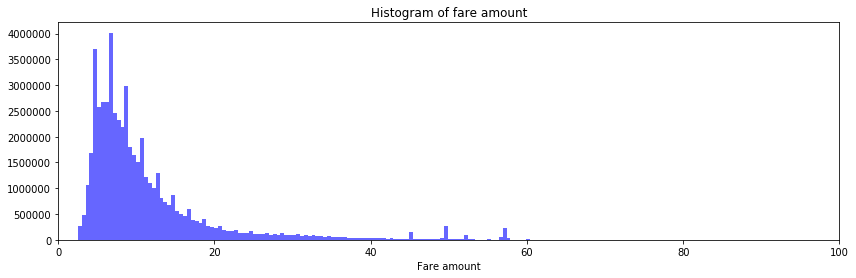

In [0]:

plt.figure(figsize = (14, 4))
plt.hist(data['fare_amount'], 1000, facecolor='blue', alpha=0.6)
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.xlim(0, 100)
plt.show();

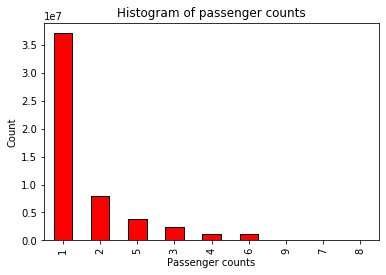

In [0]:
#check passenger counts
data['passenger_count'].value_counts().plot.bar(color = 'r', edgecolor = 'k');
plt.title('Histogram of passenger counts'); plt.xlabel('Passenger counts'); plt.ylabel('Count');

As you see above, most of passenger count is 1. After 6, it's negligible for 7,8,9. I think we can remove samples when passenger count > 6

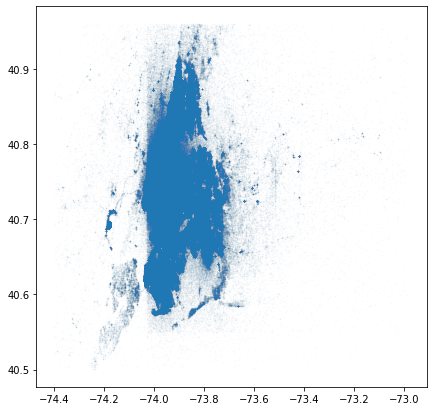

In [0]:
longitude = list(data.pickup_longitude) + list(data.dropoff_longitude)
latitude = list(data.pickup_latitude) + list(data.dropoff_latitude)
plt.figure(figsize = (7,7))
plt.plot(longitude,latitude,'.', alpha = 0.5, markersize = 0.05)
plt.show()

Text(0.5, 1.0, 'Pickups')

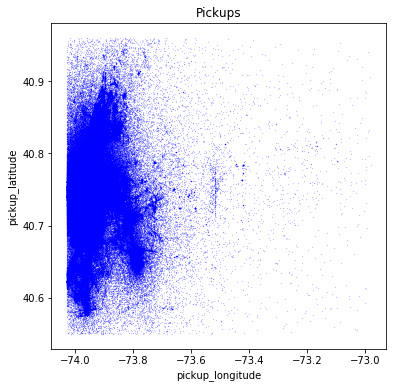

In [0]:
data.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.02, alpha=.6,figsize=(6,6))
plt.title("Pickups")


Text(0.5, 1.0, 'Dropoffs')

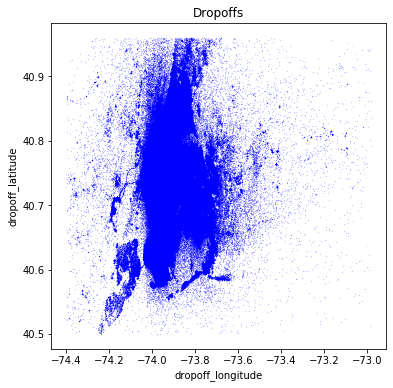

In [0]:
data.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='blue', 
                s=.02, alpha=.6,figsize=(6,6))
plt.title("Dropoffs")

In [0]:
#create a csv processed file
data.to_csv("/content/gdrive/My Drive/Big_Data/process_file.csv",index=False)